# - Churn prediction - Proyect

In [45]:
__author__ = "Jorge Aliaga Luque"
__website__ = "https://jorgealiaga36.github.io/jorge-aliaga-luque/"

The main goal of this proyect is to apply machine learning to predict churn in a telecom company.

Imagine that we are working at a telecom company that offers phone and internet services, and we have a problem: some of our customers are churning. They no longer are using our services and are going to a different provider. We would like to prevent
that from happening, so we develop a system for identifying these customers and offer them an incentive to stay.

For that, we will apply a Logistic Regression model and we will analalize its performance.

## Table of Contents

- [**1. Dataset review and preparation**](#ap1)


- [**2. Exploratory data analysis**](#ap2)
 
    - 2.1. [Missing values](#ap2_1)
    - 2.2. [Distribution of the target variable](#ap2_2)
    - 2.3. [Numerical variables](#ap2_3)
    - 2.4. [Categorical variables](#ap2_4)
    - 2.5. [Correlations](#ap2_4)
    

- [**3. Data Preprocessing and Feature engineering**](#ap3)

    - 3.1. [Feature Scaling](#ap3_1)
    - 3.2. [One hot encoding](#ap3_2)
    
    
- [**4. Model fitting and selection**](#ap4)

    - 4.1. [Hyperparameters tunning](#ap4_1)
    - 4.2. [Model selected](#ap4_2)
    - 4.3. [Evaluate model](#ap4_3)
    
     
- [**5. Model interpretation**](#ap5)

### Import libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style('darkgrid')

<a name="ap1"></a>
# 1. Dataset review  and preparation

### Load data

In [47]:
df = pd.read_csv('datasets/churn.csv')

print('Number of examples: {}'.format(len(df)))
df.head().T

Number of examples: 7043


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Data preparation 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see incorrect data types:

+ SeniorCitizen: Int64 type (1/0) where it should be object type (yes/no).
+ TotalCharges: Object type where it should be an Int64 type.
+ Churn: Object type (yes/no) where it should be an Int64 type (1/0)

In [49]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'yes', 0: 'No'})

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

Also we must remove customer IDs from the dataset.

In [50]:
df = df.drop(columns = ['customerID'], axis=1)

In [51]:
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,No,No,No,No,No
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Describe data

In [53]:
catCols = list(df.select_dtypes(include='object').columns)
print('There are {} categorical variables: \n{}'.format(len(catCols), catCols))

There are 16 categorical variables: 
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [54]:
#We exclude the target variable.

numCols = list(df.select_dtypes(exclude = 'object').columns[:-1]) 
print('There are {} numerical variables: \n{}'.format(len(numCols), numCols))

There are 3 numerical variables: 
['tenure', 'MonthlyCharges', 'TotalCharges']


<a name="ap2"></a>
# 2. Exploratory data analysis 

<a name="ap2_1"></a>
## 2.1. Missing values

In [55]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are some missing values for total charges. . 

+ It represents ~ 0.2% of the total users so it is better to remove these observations from the dataset.

In [56]:
percent = round(df.TotalCharges.isnull().sum()*100/len(df),2)
print('Total charges missing values: {} %'.format(percent))

Total charges missing values: 0.16 %


In [57]:
df = df.dropna()
df.TotalCharges.isnull().sum()

0

There is no missing values!

<a name="ap2_2"></a>
## 2.2. Target variable

+ As we can see the mayority of the customers did not churn.
+ We have an imbalanced dataset, there are three times as many people who did not churn as those who did churn.

In [58]:
global_mean = round(df['Churn'].mean(), 2)
print("Churn rate: {}".format(global_mean))

Churn rate: 0.27


0    5163
1    1869
Name: Churn, dtype: int64

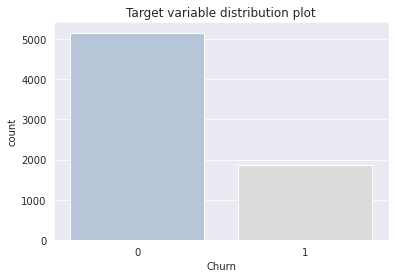

In [59]:
plt.figure(figsize=(6,4))

sns.countplot(data = df, x='Churn', palette=['#B0C4DE','#DCDCDC'])
plt.title('Target variable distribution plot')

df['Churn'].value_counts()

<a name="ap2_3"></a>
## 2.3. Numerical variables

In [60]:
print('There are {} numerical variables: \n{}'.format(len(numCols), numCols))

There are 3 numerical variables: 
['tenure', 'MonthlyCharges', 'TotalCharges']


### Correlation

In [61]:
corr = df.corrwith(df.Churn).sort_values(ascending=False)
print(corr)

Churn             1.000000
MonthlyCharges    0.192858
TotalCharges     -0.199484
tenure           -0.354049
dtype: float64


### Analysis

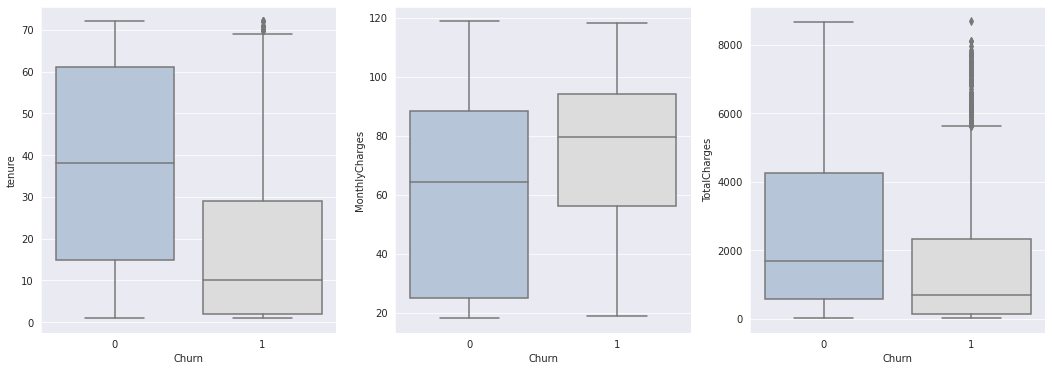

In [62]:
n_cols = 3
n_rows = 1
n_num = 0

fig, axarr = plt.subplots(n_rows, n_cols, figsize=(18, 6))

for column in np.arange(n_cols):
    sns.boxplot(y=numCols[n_num], x='Churn', data=df, ax=axarr[column], palette=['#B0C4DE','#DCDCDC'])
    n_num+=1

plt.show()

<a name="ap2_4"></a>
## 2.4. Categorical variables

In [63]:
print('There are {} categorical variables: \n{}'.format(len(catCols), catCols))

There are 16 categorical variables: 
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Unique values

In [64]:
df[catCols].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

### Analysis

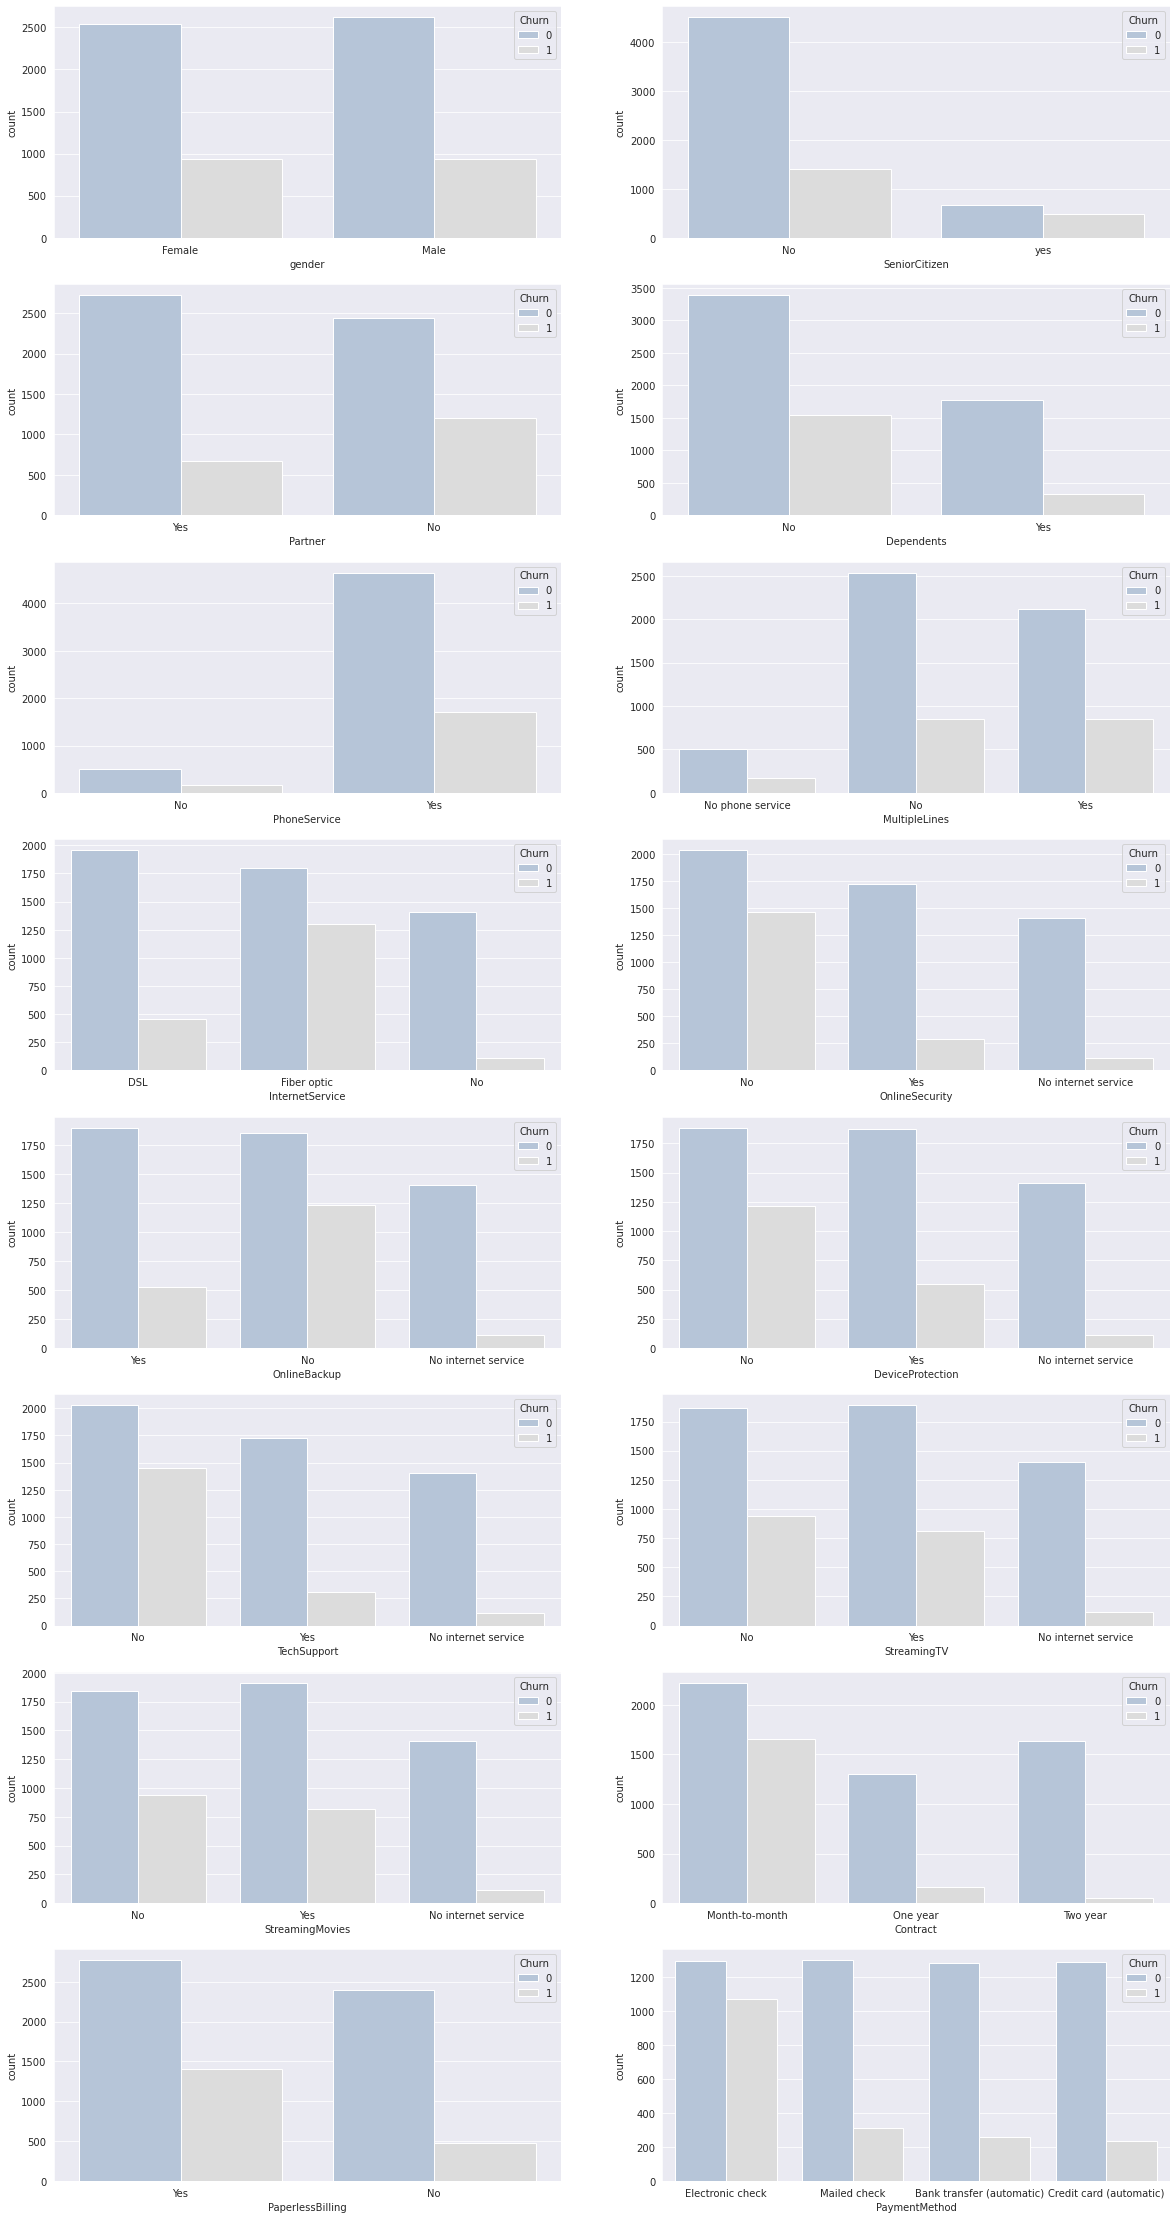

In [65]:
n_cols = 2
n_rows = 8
n_cat = 0

fig, axarr = plt.subplots(n_rows, n_cols, figsize=(20, 40))

for row in np.arange(n_rows):
    for column in np.arange(n_cols):
        sns.countplot(x=catCols[n_cat], hue='Churn', data=df, ax=axarr[row][column], palette=['#B0C4DE','#DCDCDC'])
        n_cat+=1

<a name="ap2_5"></a>
## 2.5. Correlations

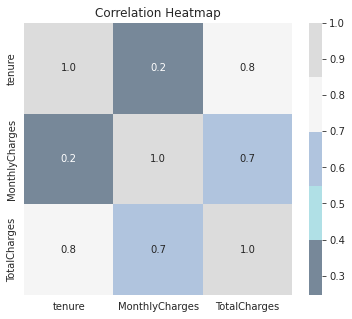

In [66]:
colors = ['#778899','#B0E0E6','#B0C4DE','#F5F5F5', '#DCDCDC']
corr_mat = df[numCols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_mat,annot=True,fmt='.1f',cmap=colors)

title = plt.title('Correlation Heatmap')

<a name="ap3"></a>
# 3. Data Preprocessing and Feature engineering

First we split our dataframe into X and y variables to avoid using our target variable in the training process.

In [67]:
X = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

<a name="ap3_1"></a>
## 3.1. Feature Scaling

It is highly recommended to scale the numerical features before training the model to achieve a better performance.

In [68]:
scaler = StandardScaler()
X[numCols] = scaler.fit_transform(X[numCols])

<a name="ap3_2"></a>
## 3.2. One-hot Encoding

Now we encode our categorical variables converting them into dummy features:

In [69]:
X = pd.get_dummies(X)

print("X shape: {}\n".format(X.shape))

X shape: (7032, 46)



In [70]:
X.head().T

,0,1,2,3,4
tenure,-1.280248,0.064303,-1.239504,0.512486,-1.239504
MonthlyCharges,-1.161694,-0.260878,-0.363923,-0.747850,0.196178
TotalCharges,-0.994194,-0.173740,-0.959649,-0.195248,-0.940457
gender_Female,1.000000,0.000000,0.000000,0.000000,1.000000
gender_Male,0.000000,1.000000,1.000000,1.000000,0.000000
SeniorCitizen_No,1.000000,1.000000,1.000000,1.000000,1.000000
SeniorCitizen_yes,0.000000,0.000000,0.000000,0.000000,0.000000
Partner_No,0.000000,1.000000,1.000000,1.000000,1.000000
Partner_Yes,1.000000,0.000000,0.000000,0.000000,0.000000
Dependents_No,1.000000,1.000000,1.000000,1.000000,1.000000


We have all the data prepared. Therefore let's build our logistic regression model.

<a name="ap4"></a>
# 4. Model fitting and selection

We split our dataset into two parts: train and test sets.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<a name="ap4_1"></a>
## 4.1. Hyperparameter tunning

In [72]:
model = LogisticRegression(solver='liblinear', random_state=1)

In [73]:
params = {'C': [0.01, 0.1, 0.5, 1, 10, 50, 100]}

model_cv = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=10)
model_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=1, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 50, 100]},
             scoring='roc_auc')

In [74]:
cv_results = pd.DataFrame(model_cv.cv_results_)[['params', 'mean_test_score']]
print(cv_results)

        params  mean_test_score
0  {'C': 0.01}         0.840713
1   {'C': 0.1}         0.843086
2   {'C': 0.5}         0.843762
3     {'C': 1}         0.843931
4    {'C': 10}         0.843968
5    {'C': 50}         0.843876
6   {'C': 100}         0.843867


In [75]:
print('Best param C: {} \nBest ROC: {} '.format(model_cv.best_params_,model_cv.best_score_))

Best param C: {'C': 10} 
Best ROC: 0.8439679212172889 


Now we have the parameters for getting the best model performance. Let's implement it!

<a name="ap4_2"></a>
## 4.2. Model selected

In [76]:
threshold_selected = 0.5

model = LogisticRegression(C=50)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]

In [77]:
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred>=threshold_selected)

<a name="ap4_3"></a>
## 4.3. Evaluate model

In [78]:
print("ROC: {}".format(roc_auc))
print("Accuracy: {} %".format(round(accuracy,4)*100))

ROC: 0.8471323286247461
Accuracy: 79.67 %


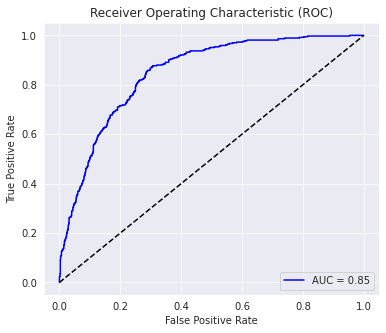

In [79]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.figure(figsize = (6, 5))

plt.plot(fpr, tpr, color='blue', label='AUC = %0.2f' %roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed')

plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()

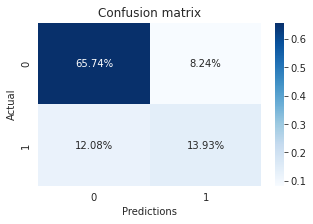

In [80]:
table = confusion_matrix(y_test, y_pred>=threshold_selected)

plt.figure(figsize=(5,3))

sns.heatmap(table/table.sum(), annot=True, cmap='Blues', fmt='.2%')

plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

In [81]:
print(classification_report(y_test, y_pred>=threshold_selected))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.54      0.58       366

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



<a name="ap5"></a>
# 5. Model interpretation

In [82]:
feat_imp = pd.DataFrame({'features': X_test.columns, 'weights': model.coef_[0]})

### Positive weights

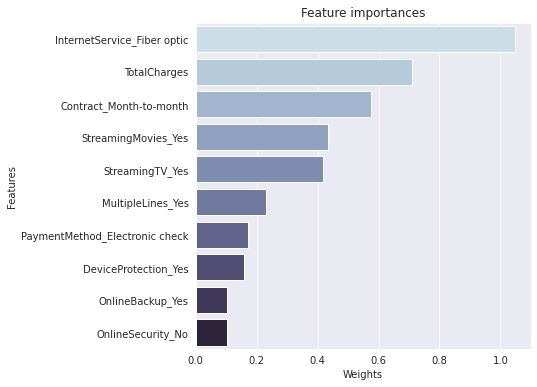

In [83]:
plt.figure(figsize=(6,6))
sns.barplot(data=feat_imp.sort_values(by='weights', ascending=False)[:10], 
            x='weights', 
            y='features', 
            orient='h',
            palette='ch:s=.25,rot=-.25')
            
plt.title('Feature importances')
plt.ylabel('Features')
plt.xlabel('Weights')
            
plt.show()

### Negative weights

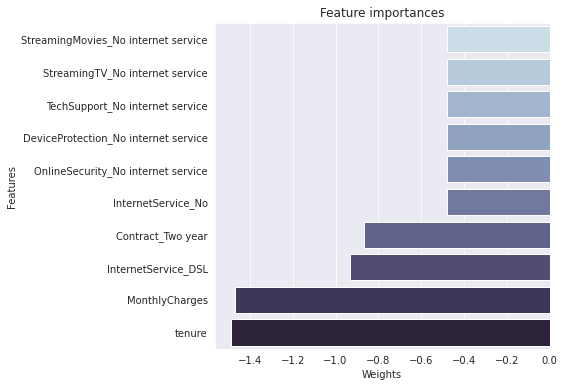

In [84]:
plt.figure(figsize=(6,6))
sns.barplot(data=feat_imp.sort_values(by='weights', ascending=False)[-10:], 
            x='weights', 
            y='features', 
            orient='h',
            palette='ch:s=.25,rot=-.25')
            
plt.title('Feature importances')
plt.ylabel('Features')
plt.xlabel('Weights')
            
plt.show()